<a href="https://colab.research.google.com/github/Sank3t-Pand3y/Neural-Networks_with_Keras/blob/main/Back_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## We will initialize the network parameters.

In [9]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Implement the backpropagation for AND Problem using similar input as used for XOR problem and plot the error.

Epoch: 9999, Average error: 0.02417
Epoch: 19999, Average error: 0.01535
Epoch: 29999, Average error: 0.01197
Epoch: 39999, Average error: 0.01009
Epoch: 49999, Average error: 0.00885
Epoch: 59999, Average error: 0.00797
Epoch: 69999, Average error: 0.00730
Epoch: 79999, Average error: 0.00676
Epoch: 89999, Average error: 0.00633
Epoch: 99999, Average error: 0.00596
Epoch: 109999, Average error: 0.00565
Epoch: 119999, Average error: 0.00538
Epoch: 129999, Average error: 0.00515
Epoch: 139999, Average error: 0.00494
Epoch: 149999, Average error: 0.00475
Epoch: 159999, Average error: 0.00459
Epoch: 169999, Average error: 0.00444
Epoch: 179999, Average error: 0.00430

Final Output after Training is : [[2.54712460e-04 4.81719829e-03 4.83434106e-03 9.92710901e-01]]
Ground Truth [0 0 0 1]
Error after training is : [[-0.00025471 -0.00481721 -0.00483436  0.00728912]]
Average error is : 0.00430


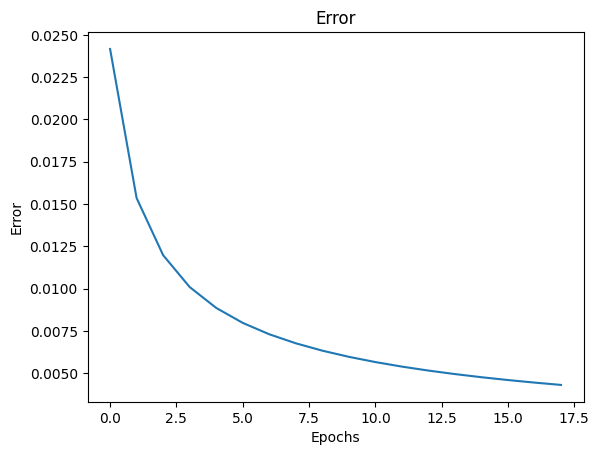

In [10]:
# Write your code here
X = np.array([[0,0], [0,1],[1,0],[1,1]]).T ## This is thee 2*4 matrix, each column is a training example i.e (2,4) 2 inputs and 4 features
d = np.array([0,0,0,1]) ## Expected Output for AND

## Get the initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

## Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1 # This is the weighted sum for hidden layer
    a1 = 1/(1 + np.exp(-z1)) # This is the Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2 ## The weighted sum for output layer
    a2 = 1/ (1+np.exp(-z2)) ## The Sigmoid activation function for output layer

    ## Error Calculation and back propagation
    error = d - a2 ## The difference between the expected output and actual output
    da2 = error * (a2  * (1-a2)) ## Derivative fot the output layer
    dz2 = da2 ## Gradient for the output layer

    ## Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2) ## Gradient for hidden layer\
    dz1 = da1 * (a1 * (1 - a1)) ## Derivative for hidden layer

    ## Update the weights and biases
    w2 += lr * np.dot(dz2, a1.T) ## Update weights from hidden to output layer
    b2 += lr * np.sum(dz2 , axis =1, keepdims = True) # Derivative fot hidden layer

    w1 += lr * np.dot(dz1, X.T)  ## Update the weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims = True) #Update the bias for hidden layer
    if (epoch + 1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

## Testing the Trained Network
z1 = np.dot(w1, X) + b1  ## Weighted Sum for hidden layer
a1 = 1 / (1 + np.exp(-z1)) ## Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2 ## Weighted Sum for Output layer
a2 = 1 / (1 + np.exp(-z2)) ## Sigmoid activation for the output layer


## Print The Result
print('\nFinal Output after Training is :', a2)
print('Ground Truth', d)
print('Error after training is :', error)
print('Average error is : %0.05f'%np.average(abs(error)))


## Plot the error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()